In [1]:
import pandas as pd
import numpy as np 
import os
import random

from datetime import datetime, timedelta

from bs4 import BeautifulSoup

pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 50000)

C:\Users\ianaz\Documents\Upwork projects\Miracle_fund\processing_ib_data\Leverage-live-trading\U7622216_20230201_20230404.htm
C:\Users\ianaz\Documents\Upwork projects\Miracle_fund\processing_ib_data\Leverage-live-trading\U7622216_20230201_20230404.htm


,account,contract,settle_date,exchange,type,quantity,price,notional value,commision,fee,code,date,time
datetime,,,,,,,,,,,,,
2023-02-21 13:30:37,U7622216,MESH3,2023-02-22,-,SELL,-1,"4,014.0000","20,070.00",-0.62,0.00,O,2023-02-21,13:30:37
2023-02-21 15:59:34,U7622216,MESH3,2023-02-22,-,BUY,1,"4,005.7500","-20,028.75",-0.62,0.00,C,2023-02-21,15:59:34
2023-02-23 15:30:55,U7622216,MESH3,2023-02-24,-,BUY,1,"4,024.5000","-20,122.50",-0.62,0.00,O,2023-02-23,15:30:55
2023-02-23 15:59:37,U7622216,MESH3,2023-02-24,-,SELL,-1,"4,018.2500","20,091.25",-0.62,0.00,C,2023-02-23,15:59:37
2023-02-24 13:30:02,U7622216,MESH3,2023-02-27,-,SELL,-1,"3,962.2500","19,811.25",-0.62,0.00,O,2023-02-24,13:30:02
2023-02-24 15:59:41,U7622216,MESH3,2023-02-27,-,BUY,1,"3,975.0000","-19,875.00",-0.62,0.00,C,2023-02-24,15:59:41
2023-03-02 15:30:05,U7622216,MESH3,2023-03-03,-,BUY,1,"3,983.2500","-19,916.25",-0.62,0.00,O,2023-03-02,15:30:05
2023-03-02 15:59:52,U7622216,MESH3,2023-03-03,-,SELL,-1,"3,984.5000","19,922.50",-0.62,0.00,C,2023-03-02,15:59:52
2023-03-03 13:30:37,U7622216,MESH3,2023-03-06,-,BUY,1,"4,038.0000","-20,190.00",-0.62,0.00,O,2023-03-03,13:30:37


,account,contract,settle_date,exchange,type,quantity,price,notional value,commision,fee,code,date,time
datetime,,,,,,,,,,,,,
2023-02-21 13:30:37,U7622216,MESH3,2023-02-22,-,SELL,-1.0,4014.00,"20,070.00",-0.62,0.00,O,2023-02-21,13:30:37
2023-02-21 15:59:34,U7622216,MESH3,2023-02-22,-,BUY,1.0,4005.75,"-20,028.75",-0.62,0.00,C,2023-02-21,15:59:34
2023-02-23 15:30:55,U7622216,MESH3,2023-02-24,-,BUY,1.0,4024.50,"-20,122.50",-0.62,0.00,O,2023-02-23,15:30:55
2023-02-23 15:59:37,U7622216,MESH3,2023-02-24,-,SELL,-1.0,4018.25,"20,091.25",-0.62,0.00,C,2023-02-23,15:59:37
2023-02-24 13:30:02,U7622216,MESH3,2023-02-27,-,SELL,-1.0,3962.25,"19,811.25",-0.62,0.00,O,2023-02-24,13:30:02
2023-02-24 15:59:41,U7622216,MESH3,2023-02-27,-,BUY,1.0,3975.00,"-19,875.00",-0.62,0.00,C,2023-02-24,15:59:41
2023-03-02 15:30:05,U7622216,MESH3,2023-03-03,-,BUY,1.0,3983.25,"-19,916.25",-0.62,0.00,O,2023-03-02,15:30:05
2023-03-02 15:59:52,U7622216,MESH3,2023-03-03,-,SELL,-1.0,3984.50,"19,922.50",-0.62,0.00,C,2023-03-02,15:59:52
2023-03-03 13:30:37,U7622216,MESH3,2023-03-06,-,BUY,1.0,4038.00,"-20,190.00",-0.62,0.00,O,2023-03-03,13:30:37


C:\Users\ianaz\AppData\Local\Temp/ipykernel_35020/1434458404.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_buy['price'] = data_buy['price'] * data_buy['quantity']
C:\Users\ianaz\AppData\Local\Temp/ipykernel_35020/1434458404.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sell['price'] = data_sell['price'] * data_sell['quantity'] * -1


(14,)

(14,)

,account,contract,settle_date,exchange,type,quantity,price,notional value,commision,fee,code,date,time
datetime,,,,,,,,,,,,,
2023-02-21 15:59:34,U7622216,MESH3,2023-02-22,-,BUY,1.0,4005.75,"-20,028.75",-0.62,0.00,C,2023-02-21,15:59:34
2023-02-23 15:30:55,U7622216,MESH3,2023-02-24,-,BUY,1.0,4024.50,"-20,122.50",-0.62,0.00,O,2023-02-23,15:30:55
2023-02-24 15:59:41,U7622216,MESH3,2023-02-27,-,BUY,1.0,3975.00,"-19,875.00",-0.62,0.00,C,2023-02-24,15:59:41
2023-03-02 15:30:05,U7622216,MESH3,2023-03-03,-,BUY,1.0,3983.25,"-19,916.25",-0.62,0.00,O,2023-03-02,15:30:05
2023-03-03 13:30:37,U7622216,MESH3,2023-03-06,-,BUY,1.0,4038.00,"-20,190.00",-0.62,0.00,O,2023-03-03,13:30:37
2023-03-09 15:59:49,U7622216,MESH3,2023-03-10,-,BUY,1.0,3919.00,"-19,595.00",-0.62,0.00,C,2023-03-09,15:59:49
2023-03-13 15:17:50,U7622216,MESH3,2023-03-14,-,BUY,1.0,3881.75,"-19,408.75",-0.62,0.00,C,2023-03-13,15:17:50
2023-03-15 13:30:05,U7622216,MESM3,2023-03-16,-,BUY,1.0,3895.00,"-19,475.00",-0.62,0.00,O,2023-03-15,13:30:05
2023-03-17 14:24:22,U7622216,MESM3,2023-03-20,-,BUY,1.0,3941.25,"-19,706.25",-0.62,0.00,O,2023-03-17,14:24:22


,account,contract,settle_date,exchange,type,quantity,price,notional value,commision,fee,code,date,time
datetime,,,,,,,,,,,,,
2023-02-21 13:30:37,U7622216,MESH3,2023-02-22,-,SELL,-1.0,4014.00,"20,070.00",-0.62,0.00,O,2023-02-21,13:30:37
2023-02-23 15:59:37,U7622216,MESH3,2023-02-24,-,SELL,-1.0,4018.25,"20,091.25",-0.62,0.00,C,2023-02-23,15:59:37
2023-02-24 13:30:02,U7622216,MESH3,2023-02-27,-,SELL,-1.0,3962.25,"19,811.25",-0.62,0.00,O,2023-02-24,13:30:02
2023-03-02 15:59:52,U7622216,MESH3,2023-03-03,-,SELL,-1.0,3984.50,"19,922.50",-0.62,0.00,C,2023-03-02,15:59:52
2023-03-03 15:59:41,U7622216,MESH3,2023-03-06,-,SELL,-1.0,4049.25,"20,246.25",-0.62,0.00,C,2023-03-03,15:59:41
2023-03-09 14:56:06,U7622216,MESH3,2023-03-10,-,SELL,-1.0,3941.75,"19,708.75",-0.62,0.00,O,2023-03-09,14:56:06
2023-03-13 15:17:31,U7622216,MESH3,2023-03-14,-,SELL,-1.0,3882.75,"19,413.75",-0.62,0.00,O,2023-03-13,15:17:31
2023-03-15 15:59:31,U7622216,MESM3,2023-03-16,-,SELL,-1.0,3919.25,"19,596.25",-0.62,0.00,C,2023-03-15,15:59:31
2023-03-17 15:59:57,U7622216,MESM3,2023-03-20,-,SELL,-1.0,3947.00,"19,735.00",-0.62,0.00,C,2023-03-17,15:59:57


C:\Users\ianaz\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\ianaz\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\ianaz\AppData\Local\Temp/ipykernel_35020/1434458404.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,account,contract,settle_date,exchange,type,quantity,price,notional value,commision,fee,code,date,time,pnl,ret_denominator,real_ret
datetime,,,,,,,,,,,,,,,,
2023-02-21 15:59:34,U7622216,MESH3,2023-02-22,-,BUY,1.0,4005.75,"-20,028.75",-0.62,0.00,C,2023-02-21,15:59:34,41.25,20028.75,0.002060
2023-02-23 15:30:55,U7622216,MESH3,2023-02-24,-,BUY,1.0,4024.50,"-20,122.50",-0.62,0.00,O,2023-02-23,15:30:55,-31.25,20122.50,-0.001553
2023-02-24 15:59:41,U7622216,MESH3,2023-02-27,-,BUY,1.0,3975.00,"-19,875.00",-0.62,0.00,C,2023-02-24,15:59:41,-63.75,19875.00,-0.003208
2023-03-02 15:30:05,U7622216,MESH3,2023-03-03,-,BUY,1.0,3983.25,"-19,916.25",-0.62,0.00,O,2023-03-02,15:30:05,6.25,19916.25,0.000314
2023-03-03 13:30:37,U7622216,MESH3,2023-03-06,-,BUY,1.0,4038.00,"-20,190.00",-0.62,0.00,O,2023-03-03,13:30:37,56.25,20190.00,0.002786
2023-03-09 15:59:49,U7622216,MESH3,2023-03-10,-,BUY,1.0,3919.00,"-19,595.00",-0.62,0.00,C,2023-03-09,15:59:49,113.75,19595.00,0.005805
2023-03-13 15:17:50,U7622216,MESH3,2023-03-14,-,BUY,1.0,3881.75,"-19,408.75",-0.62,0.00,C,2023-03-13,15:17:50,5.00,19408.75,0.000258
2023-03-15 13:30:05,U7622216,MESM3,2023-03-16,-,BUY,1.0,3895.00,"-19,475.00",-0.62,0.00,O,2023-03-15,13:30:05,121.25,19475.00,0.006226
2023-03-17 14:24:22,U7622216,MESM3,2023-03-20,-,BUY,1.0,3941.25,"-19,706.25",-0.62,0.00,O,2023-03-17,14:24:22,28.75,19706.25,0.001459


<AxesSubplot:xlabel='datetime'>

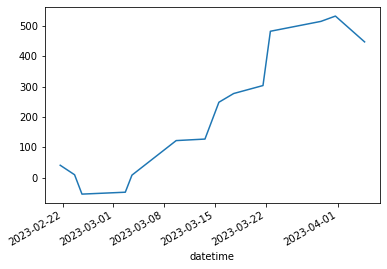

In [25]:
path = r'C:\Users\ianaz\Documents\Upwork projects\Miracle_fund\processing_ib_data\Leverage-live-trading'
htm = ''



pnl_paths = []
for file in os.listdir(path):
    pnl_paths.append(os.path.join(path, file))  # all csv file in this
    


for p in pnl_paths:
    print(p)
    page = open(p, encoding="utf8")

    soup = BeautifulSoup(page)
    tr = soup.find_all( class_ = "row-summary" )

    tr_list = []
    for i in tr:
        td = i.find_all('td')

        td_list = []
        for j in td:
            text = j.get_text()

            
            td_list.append(text)
        tr_list.append(td_list)

    data = pd.DataFrame(tr_list, columns=['account', 'contract', 'date/time', 'settle_date', 'exchange', 'type', 'quantity', 
                                        'price', 'notional value', 'commision', 'fee', 'code'])

    print(p)
    
    #test = data[(data['contract'] == 'MESH3') or (data['contract'] == 'MESM3')]
    contract_list = ['MESH3', 'MESM3']
    test = data[data['contract'].isin(contract_list)]

    if len(test) >= 1:
        
        data = data[data['contract'].isin(contract_list)]
        data['date'] = [i[:10] for i in data['date/time']]
        data['time'] = [i[12:] for i in data['date/time']]
        data.drop(columns=['date/time'], inplace=True)
        data['datetime'] = data['date'] + ' ' +data['time'] 
        data.set_index('datetime', inplace=True)

        data.index = pd.to_datetime(data.index)
        data.sort_index(inplace=True)
        float_list = ['price', 'commision', 'quantity']

        display(data)
        
        for i in float_list:
            data[i] = [i.replace(',', '') for i in data[i]]
            data[i] = data[i].astype('float')

        data = data[~data.index.normalize().isin([pd.Timestamp('2023-03-16')])]

        display(data)
        
        data_o = data[data['code'] == 'O']
        data_c = data[data['code'] == 'C']
        data_buy = data[data['type'] == 'BUY']
        data_buy['price'] = data_buy['price'] * data_buy['quantity']
            
        data_sell = data[data['type'] == 'SELL']
        data_sell['price'] = data_sell['price'] * data_sell['quantity'] * -1

        display(data_buy['price'].shape, data_sell['price'].shape)
        display(data_buy, data_sell)
        data_pnl = (data_sell['price'].values - data_buy['price'].values)

        data_buy.loc[:,'pnl'] = data_pnl * 5
        data_buy['ret_denominator'] = data['price'] * 5 * data['quantity']
        data_buy['real_ret'] = data_buy['pnl']/data_buy['ret_denominator']
        display(data_buy)
        
    else:
        pass


# df_whole = pd.read_csv('df_pnl.csv')
# df_whole.set_index('Unnamed: 0', inplace=True)
# df_whole.index = pd.to_datetime(df_whole.index)

# df_whole = df_whole.append(df_pnl)
data_buy = data_buy.between_time('9:30','16:00')
#df_pnl = df_pnl['2023-02-21':]
data_buy['pnl'].cumsum().plot()


In [43]:
import pandas_market_calendars as mcal

def gen_stats(data, returns, freq=None, window=None, strategy=False):
    
    idx = pd.date_range('2023-02-21', '2023-04-04', freq="d")
    nyse = mcal.get_calendar('NYSE')
    holidays_nyse = nyse.holidays().holidays

    
    data = data.copy()
    data.drop_duplicates(inplace=True)

    data = data.reindex(idx)
   
    data = data[data.index.dayofweek < 5]
  
    data = data [~data.index.isin(holidays_nyse)]
 
    
    data.fillna(0, inplace=True)
    fract_trade = (data[data['real_ret'] != 0.000000].shape[0])/data.shape[0]

    target_ret = data[returns]
    display(target_ret)
    

    pfstats = pd.DataFrame(columns=['Strategy'])
                       
    # Mean / std. dev. of return
    ret_m = target_ret.mean()
    print(ret_m)

    ret_s = target_ret.std()

    if freq == 'daily':

        ret_ann = ret_m*252
        print(ret_ann)
        ret_vol = ret_s*np.sqrt(252)

    if freq == 'weekly':
        ret_ann = (1+ret_m)*52-1
        ret_vol = ret_s*np.sqrt(52)
        
    pfstats.loc['Ann. Return'] = str(round(ret_ann * 100, 1)) + '%'
    pfstats.loc['Ann. Volatility'] = str(round(ret_vol * 100, 1)) + '%'
    
    # Sharpe
    sharpe = ret_ann/ret_vol
    
    pfstats.loc['Sharpe Ratio (ann.)'] = sharpe.round(2)

    # Maximum Drawdown rolling
    cum_ret = 1000*(1+target_ret).cumprod()-1
    max_dd = cum_ret/cum_ret.rolling(window).max()-1
    max_dd = max_dd.min()
    
    if freq == 'weekly':
        max_dd_string = str(window)+'-W'
    else:
        max_dd_string = str(window)+'-D'

    pfstats.loc['Max. DD ('+max_dd_string+' rolling)'] = str(round(max_dd, 3))
        
 
    # Skewness
    ret_skew = target_ret.skew()
    
    if freq == 'daily':
        ret_skew_ann = ret_skew/np.sqrt(252)
    
    pfstats.loc['Skew (ann.)'] = ret_skew_ann.round(2)
    
    # Fraction of days traded
    pfstats.loc['Days Traded'] = str(int(round(fract_trade * 100, 2))) + '%'
        
    return pfstats

In [44]:
data_daily = data_buy.resample('d').sum()
data_daily.head()

,quantity,price,commision,pnl,ret_denominator,real_ret
datetime,,,,,,
2023-02-21,1.0,4005.75,-0.62,41.25,20028.75,0.002060
2023-02-22,0.0,0.00,0.00,0.00,0.00,0.000000
2023-02-23,1.0,4024.50,-0.62,-31.25,20122.50,-0.001553
2023-02-24,1.0,3975.00,-0.62,-63.75,19875.00,-0.003208
2023-02-25,0.0,0.00,0.00,0.00,0.00,0.000000


In [46]:
gen_stats(data_daily, 'real_ret', freq='daily', window=60)

2023-02-21    0.002060
2023-02-22    0.000000
2023-02-23   -0.001553
2023-02-24   -0.003208
2023-02-27    0.000000
2023-02-28    0.000000
2023-03-01    0.000000
2023-03-02    0.000314
2023-03-03    0.002786
2023-03-06    0.000000
2023-03-07    0.000000
2023-03-08    0.000000
2023-03-09    0.005805
2023-03-10    0.000000
2023-03-13    0.000258
2023-03-14    0.000000
2023-03-15    0.006226
2023-03-16    0.000000
2023-03-17    0.001459
2023-03-20    0.000000
2023-03-21    0.001302
2023-03-22    0.009006
2023-03-23    0.000000
2023-03-24    0.000000
2023-03-27    0.000000
2023-03-28    0.000000
2023-03-29    0.000802
2023-03-30    0.000000
2023-03-31    0.000423
2023-04-03    0.000000
2023-04-04   -0.002058
Name: real_ret, dtype: float64

0.0007619664226108938
0.19201553849794523


,Strategy
Ann. Return,19.2%
Ann. Volatility,3.8%
Sharpe Ratio (ann.),5.09
Max. DD (60-D rolling),nan
Skew (ann.),0.13
Days Traded,45%


In [27]:
df_pnl

,pnl
2023-02-10 09:59:04,-235.0
2023-02-10 10:07:03,-225.0
2023-02-10 11:16:06,-45.0
2023-02-10 11:39:03,-85.0
2023-02-10 11:44:07,-40.0
2023-02-10 11:57:03,-30.0
2023-02-10 12:12:04,-65.0
2023-02-21 11:16:03,-130.0
2023-02-21 11:23:04,-20.0
2023-02-21 11:48:04,-35.0


In [15]:
df_whole

,pnl
2023-02-06 09:46:03,-390.000000
2023-02-06 09:51:07,-30.000000
2023-02-06 10:07:03,15.000000
2023-02-06 10:37:04,-40.000000
2023-02-06 11:54:04,110.000000
2023-02-06 13:07:03,180.000000
2023-02-06 13:35:04,-50.000000
2023-02-06 13:40:08,-40.000000
2023-02-06 13:47:04,-15.000000
2023-02-06 14:59:03,-75.000000
